In [1]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from num2words import num2words
import re
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [14]:
import pandas as pd
from math import log

In [130]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

### 데이터 전처리

In [94]:
text = """At least seven people have been killed and more than a dozen injured in a Russian missile attack on Kharkiv, north-eastern Ukraine, according to the regional head.
A further two people remain missing after the attack, which saw Russian forces strike Ukraine's second-largest city at least 15 times, Oleg Sinegubov said.
He advised people in the city to remain in shelters.
Ukraine's state railway company said several of its facilities had been damaged in the attack and a number of its employees had been injured.
Earlier this month, Russian forces began a renewed offensive in the region in an attempt to break through a weakened Ukrainian front line.
On Wednesday, Mr Sinegubov said fighting was continuing near the towns of Pletenivka and Vovchansk, but that Ukraine's forces were in control.
"This weakness is not ours, but the world's, which has not dared to deal with terrorists in the way they deserve for three years," he said in a post on X.
Ukrainian President Volodymyr Zelensky said the attacks on Kharkiv showed that Russia was taking advantage of Ukraine's lack of air defences.
Supplies of US-made surface-to-air missile systems were delayed by wrangling in Congress over a multi-billion dollar aid package for Ukraine which was only passed last month.
Mr Zelensky has repeatedly called for more air defence missiles and the supply of modern fighter jets from his allies.
Russia's glide bombs devastating Ukraine's cities on the cheap
Thousands flee Russian offensive in Kharkiv region
Ukraine's defence lines stretched as Russian troops advance
Fighting in the region has displaced around 14,000 people, according to the World Health Organization (WHO).
The estimated 189,000 people who remain near the border with Russia face “significant risks due to ongoing fighting”, WHO’s Jarno Habicht said.
Russia's President Vladimir Putin claims it is not his intention to capture Kharkiv, but that the aim was to create a "security zone" for Russia's border region.
Ukraine has been launching its own attacks into Russian territory.
Belgorod, located just 12km (7 miles) from the border with Ukraine, has been targeted a number of times, including earlier this week when a woman was killed and three others were injured as a result of a drone strike on a moving car."""
text = str(text)

In [95]:
text2 = """The standard 30-year fixed-rate mortgage averaged 6.94% in the week ending May 23, down from last week’s average of 7.02%, according to Freddie Mac data released Thursday. That’s the lowest level since early April and below the key 7% threshold.
After moving sideways throughout March, mortgage rates began to climb in late April as economic data showed that inflation’s cooldown stalled earlier in the year. Mortgage rates track the benchmark 10-year US Treasury yield, which moves in anticipation of the Federal Reserve’s decisions on interest rates. Stubbornly high inflation this year has dashed hopes that the Fed could cut interest rates in the spring or in the summer. But there’s finally been some good news on that front: The Consumer Price Index for April, released last week, showed that inflation didn’t pick up. Bond yields have mostly retreated this month.

“Spring homebuyers received an unexpected windfall this week, as mortgage rates fell below the seven percent threshold for the first time in over a month,” Sam Khater, Freddie Mac’s chief economist, said in a release.

Some Fed officials said earlier this week that they likely won’t raise interest rates again and a few have said they expect to cut rates this year. That bodes well for lower mortgage rates.

But for now, the housing market’s recovery is stagnant. Sales of previously owned homes, which make up the vast majority of the housing market, fell in April for the second month in a row, the National Association of Realtors reported Wednesday. That’s a stark contrast from earlier in the year when sales soared. """
text2 = str(text2)

In [96]:
text3= """Saints' 11-year spell in the top flight came to an end after a wretched campaign last time out but, despite finishing one place and three points behind Leeds in fourth, it is they who join Leicester and Ipswich in going up.

Adam Armstrong scored the decisive goal with a clinical finish after being put clear by Will Smallbone.

Leeds substitute Dan James clattered a bouncing ball against the crossbar late on as they pushed for an equaliser but Russell Martin's men saw out almost 12 minutes of time added on.

Defeat for Leeds consigned them to another season in the Championship and meant they have now lost their past three finals at Wembley without scoring and been unsuccessful in all six of their play-off campaigns.

Saints' promotion means that all three play-off finals this year were won by the team who had finished lower in the league table, with the team who had finished higher failing to score in all three."""
text3 = str(text3)

In [146]:
text4="""Scientists conducting research in the Amazon rainforest have made an exciting discovery - a new species of frog. The frog, named "Amazonian Emerald Frog" due to its striking green coloration, was found deep within the dense foliage of the rainforest.

The discovery was made during a biodiversity survey conducted by a team of biologists from several international research institutions. They were studying the diverse ecosystem of the Amazon when they stumbled upon this previously unknown amphibian species.

The Amazonian Emerald Frog exhibits unique characteristics that distinguish it from other frog species in the region. Its vibrant green skin, speckled with tiny golden spots, makes it stand out against the lush green backdrop of the rainforest. Additionally, its distinctive call, which resembles the sound of a tinkling bell, was instrumental in identifying and locating the species."""

In [147]:
tokens = word_tokenize(text.lower())
tokens =  [i.replace(",", "") for i in tokens]
adj_text = " ".join([num2words(i) if i.isdigit() else i for i in tokens])
tokens = word_tokenize(adj_text)
adj_text = re.sub(r'^[^a-z]', ' ', adj_text)
tokens = word_tokenize(adj_text)
stop_words = set(nltk.corpus.stopwords.words("english"))
tokensWSW = [word for word in tokens if word not in stop_words]
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_list = []
for word in tokensWSW:
    lemmatized_list.append(wordnet_lemmatizer.lemmatize(word))
clean_text = " ".join(lemmatized_list)
clean_text

"least seven people killed dozen injured russian missile attack kharkiv north-eastern ukraine according regional head . two people remain missing attack saw russian force strike ukraine 's second-largest city least fifteen time oleg sinegubov said . advised people city remain shelter . ukraine 's state railway company said several facility damaged attack number employee injured . earlier month russian force began renewed offensive region attempt break weakened ukrainian front line . wednesday mr sinegubov said fighting continuing near town pletenivka vovchansk ukraine 's force control . `` weakness world 's dared deal terrorist way deserve three year `` said post x. ukrainian president volodymyr zelensky said attack kharkiv showed russia taking advantage ukraine 's lack air defence . supply us-made surface-to-air missile system delayed wrangling congress multi-billion dollar aid package ukraine passed last month . mr zelensky repeatedly called air defence missile supply modern fighter 

In [148]:
def preprocess_text(text):
    # 소문자로 변환 후 토큰화
    tokens = word_tokenize(text.lower())
    
    # 쉼표 제거
    tokens = [i.replace(",", "") for i in tokens]
    
    # 숫자를 영어 단어로 변환
    adj_text = " ".join([num2words(i) if i.isdigit() else i for i in tokens])
    
    # 알파벳이 아닌 문자 제거
    adj_text = re.sub(r'^[^a-z]', ' ', adj_text)
    
    # 다시 토큰화
    tokens = word_tokenize(adj_text)
    
    # 불용어 제거
    stop_words = set(nltk.corpus.stopwords.words("english"))
    tokensWSW = [word for word in tokens if word not in stop_words]
    
    # 표제어 추출
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = [wordnet_lemmatizer.lemmatize(word) for word in tokensWSW]
    
    # 정제된 텍스트 반환
    return " ".join(lemmatized_list)

In [151]:
clean_text2 = preprocess_text(text2)
clean_text3 = preprocess_text(text3)
clean_text4 = preprocess_text(text4)

In [160]:
corpus = [] #corpus 텍스트 데이터를 모아놓은 집합
corpus.append(clean_text)
corpus.append(clean_text2)
corpus.append(clean_text3)
corpus.append(clean_text4)

corpus

["least seven people killed dozen injured russian missile attack kharkiv north-eastern ukraine according regional head . two people remain missing attack saw russian force strike ukraine 's second-largest city least fifteen time oleg sinegubov said . advised people city remain shelter . ukraine 's state railway company said several facility damaged attack number employee injured . earlier month russian force began renewed offensive region attempt break weakened ukrainian front line . wednesday mr sinegubov said fighting continuing near town pletenivka vovchansk ukraine 's force control . `` weakness world 's dared deal terrorist way deserve three year `` said post x. ukrainian president volodymyr zelensky said attack kharkiv showed russia taking advantage ukraine 's lack air defence . supply us-made surface-to-air missile system delayed wrangling congress multi-billion dollar aid package ukraine passed last month . mr zelensky repeatedly called air defence missile supply modern fighter

### tfdif 

In [161]:
vocab = list(set(" ".join(corpus).split()))
vocab.sort()

In [48]:
N = len(corpus)

In [57]:
#특정 문서 d에서의 특정 단어 t의 등장 횟수.
def tf(t, d):
    return d.count(t)
#df(t)특정 단어 t가 등장한 문서의 수.df(t)에 반비례하는 수.
def idf(t):
    df = 0
    for doc in corpus:
        df += t in doc.split()
    return log(N / (df + 1))
    
#TF와 IDF를 곱한 값
def tfidf(t, d):
    df = 0
    for doc in corpus:
        df += t in doc.split()
    return d.split().count(t) * log(N / (df + 1))

In [58]:
result = []
for i in range(N):
    result.append([])
    d = corpus[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_df = pd.DataFrame(result, columns=vocab)
tf_df

,%,'s,(,),.,10-year,12km,30-year,6.94,7.02,...,world,wrangling,x.,year,yield,zelensky,zone,’,“,”
0,0,10,2,2,15,0,1,0,0,0,...,2,1,1,1,0,2,1,1,1,1
1,3,0,0,0,15,1,0,1,1,1,...,0,0,0,6,2,0,0,10,1,1


In [59]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
idf_df = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_df

,IDF
%,0.000000
's,0.000000
(,0.000000
),0.000000
.,-0.405465
...,...
zelensky,0.000000
zone,0.000000
’,-0.405465
“,-0.405465


In [62]:
result = []
for i in range(N):
    result.append([])
    d = corpus[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))
tfidf_df = pd.DataFrame(result, columns=vocab)
tfidf_df


,%,'s,(,),.,10-year,12km,30-year,6.94,7.02,...,world,wrangling,x.,year,yield,zelensky,zone,’,“,”
0,0.0,0.0,0.0,0.0,-5.676512,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.405465,0.0,0.0,0.0,-0.405465,-0.405465,-0.405465
1,0.0,0.0,0.0,0.0,-5.271046,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.621860,0.0,0.0,0.0,-4.054651,-0.405465,-0.405465


### tfdif-sklearn

TF-IDF는 "Term Frequency-Inverse Document Frequency"의 약자로, 문서 내에서 단어의 중요성을 평가하는 데 널리 사용되는 통계적인 방법입니다. 이 방법은 정보 검색 및 텍스트 마이닝과 같은 자연어 처리 작업에서 특히 유용합니다.

- **단어 빈도 (Term Frequency, TF)**: 문서 내에서 단어가 얼마나 자주 등장하는지를 나타냅니다. 일반적으로 문서 내에서 한 단어가 자주 등장할수록 해당 단어의 중요성이 높다고 간주됩니다. 하지만 모든 문서에서 자주 등장하는 단어는 문서를 식별하는 데 유용하지 않을 수 있습니다.

- **역문서 빈도 (Inverse Document Frequency, IDF)**: 단어의 전체적인 등장 빈도를 고려합니다. 드물게 등장하는 단어가 문서를 식별하는 데 더 큰 중요성을 갖는다고 가정합니다. 이를 위해 역문서 빈도는 해당 단어가 전체 문서 집합에서 얼마나 자주 등장하는지의 역수를 계산합니다.

TF-IDF는 이 두 가지 요소를 조합하여 단어의 상대적인 중요성을 결정합니다. 한 단어의 TF-IDF 점수는 해당 단어의 단어 빈도와 역문서 빈도의 곱으로 계산됩니다. 따라서 TF-IDF는 특정 문서 내에서 자주 등장하지만, 전체 문서 집합에서는 드물게 등장하는 단어에 높은 가중치를 부여합니다.
부여합니다.

In [162]:
corpus

["least seven people killed dozen injured russian missile attack kharkiv north-eastern ukraine according regional head . two people remain missing attack saw russian force strike ukraine 's second-largest city least fifteen time oleg sinegubov said . advised people city remain shelter . ukraine 's state railway company said several facility damaged attack number employee injured . earlier month russian force began renewed offensive region attempt break weakened ukrainian front line . wednesday mr sinegubov said fighting continuing near town pletenivka vovchansk ukraine 's force control . `` weakness world 's dared deal terrorist way deserve three year `` said post x. ukrainian president volodymyr zelensky said attack kharkiv showed russia taking advantage ukraine 's lack air defence . supply us-made surface-to-air missile system delayed wrangling congress multi-billion dollar aid package ukraine passed last month . mr zelensky repeatedly called air defence missile supply modern fighter

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
tfidfv = TfidfVectorizer().fit(corpus)

In [165]:
word_id_list = sorted(tfidfv.vocabulary_.items(), key=lambda x: x[1], reverse=False)
word_list = [x[0] for x in word_id_list]
word_list

['02',
 '10',
 '11',
 '12km',
 '30',
 '94',
 'according',
 'adam',
 'added',
 'additionally',
 'advance',
 'advantage',
 'advised',
 'aid',
 'aim',
 'air',
 'ally',
 'almost',
 'amazon',
 'amazonian',
 'amphibian',
 'another',
 'anticipation',
 'april',
 'armstrong',
 'around',
 'association',
 'attack',
 'attempt',
 'average',
 'averaged',
 'backdrop',
 'ball',
 'began',
 'behind',
 'belgorod',
 'bell',
 'benchmark',
 'billion',
 'biodiversity',
 'biologist',
 'bodes',
 'bomb',
 'bond',
 'border',
 'bouncing',
 'break',
 'call',
 'called',
 'came',
 'campaign',
 'capture',
 'car',
 'championship',
 'characteristic',
 'cheap',
 'chief',
 'city',
 'claim',
 'clattered',
 'clear',
 'climb',
 'clinical',
 'coloration',
 'company',
 'conducted',
 'conducting',
 'congress',
 'consigned',
 'consumer',
 'continuing',
 'contrast',
 'control',
 'cooldown',
 'could',
 'create',
 'crossbar',
 'cut',
 'damaged',
 'dan',
 'dared',
 'dashed',
 'data',
 'deal',
 'decision',
 'decisive',
 'deep',
 'de

In [166]:
print(tfidfv.transform(corpus).toarray())

[[0.         0.         0.         ... 0.         0.08697284 0.04348642]
 [0.05491334 0.05491334 0.         ... 0.10982668 0.         0.        ]
 [0.         0.         0.09484832 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [167]:
tf_idf_df = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = word_list, index = ['text1','text2','text3','text4'])

tf_idf_df

,02,10,11,12km,30,94,according,adam,added,additionally,...,within,without,woman,world,wrangling,wretched,year,yield,zelensky,zone
text1,0.000000,0.000000,0.000000,0.043486,0.000000,0.000000,0.068570,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.043486,0.086973,0.043486,0.000000,0.027757,0.000000,0.086973,0.043486
text2,0.054913,0.054913,0.000000,0.000000,0.054913,0.054913,0.043294,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210303,0.109827,0.000000,0.000000
text3,0.000000,0.000000,0.094848,0.000000,0.000000,0.000000,0.000000,0.094848,0.094848,0.000000,...,0.000000,0.094848,0.000000,0.000000,0.000000,0.094848,0.121081,0.000000,0.000000,0.000000
text4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086641,...,0.086641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 코사인 유사도

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

In [168]:
from sklearn.metrics.pairwise import cosine_similarity
feature = tfidfv.fit_transform(corpus).toarray()
cosine_sim = cosine_similarity(feature, feature)

In [169]:
cosine_sim.shape

(4, 4)

In [170]:
cosine_sim

array([[1.        , 0.08292365, 0.03033381, 0.01873577],
       [0.08292365, 1.        , 0.04891449, 0.00591474],
       [0.03033381, 0.04891449, 1.        , 0.01021615],
       [0.01873577, 0.00591474, 0.01021615, 1.        ]])

In [171]:
cos_sim_df = pd.DataFrame(cosine_similarity(tf_idf_df, tf_idf_df), columns = ['text1','text2','text3','text4'], index = ['text1','text2','text3','text4'])

cos_sim_df

,text1,text2,text3,text4
text1,1.000000,0.082924,0.030334,0.018736
text2,0.082924,1.000000,0.048914,0.005915
text3,0.030334,0.048914,1.000000,0.010216
text4,0.018736,0.005915,0.010216,1.000000


In [172]:
cos_sim_df[cos_sim_df < (1-1e-6)].idxmax()  #idxmax() 함수는 데이터프레임에서 가장 큰 값을 가지는 인덱스를 반환하는 함수

text1    text2
text2    text1
text3    text2
text4    text1
dtype: object

### Hierarchical agglomerative clusteringr계층적 군집 분석)

`linkage` 매개변수는 병합된 군집의 분산을 최소화하는 링크 기준을 결정합니다. 선택할 수 있는 옵션으로는 `'ward'`, `'complete'`, `'average'`, 또는 `'single'`이 있습니다.

- `'ward'`는 병합된 군집의 분산을 최소화합니다.
- `'complete'`는 두 집합의 모든 관측치 간의 최대 거리를 사용합니다.
- `'average'`는 두 집합의 관측치 간의 거리 평균을 사용합니다.
- `'single'`은 두 집합의 모든 관측치 간의 최소 거리를 사용합니다.
용합니다.

In [ ]:
 # X= np.array([[5,3],
 #    [10,15],
 #    [15,12],
 #    [24,10],
 #    [30,30],
 #    [85,70],
 #    [71,80],
 #    [60,78],
 #    [70,55],
 #    [80,91],])

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# from matplotlib import pyplot as plt

# linked = linkage(X, 'single')

# labelList = range(1, 11)

# plt.figure(figsize=(10, 7))
# dendrogram(linked,
#             orientation='top',
#             labels=labelList,
#             distance_sort='descending',
#             show_leaf_counts=True)
# plt.show()

In [173]:
# 클러스터링을 수행하는 함수
def clustering_model(similarity_matrix):
    # 계층적 병합 클러스터링 
    clustering = linkage(similarity_matrix, method='ward')
    return clustering

In [174]:
# 덴드로그램을 그리는 함수
def plot_dendrogram(clustering, labels):
    plt.figure(figsize=(10, 7))
    dendrogram(clustering, labels=labels, orientation='right')
    plt.xlabel('Distance')
    plt.ylabel('Document')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

In [175]:
clustering=clustering_model(cosine_sim)

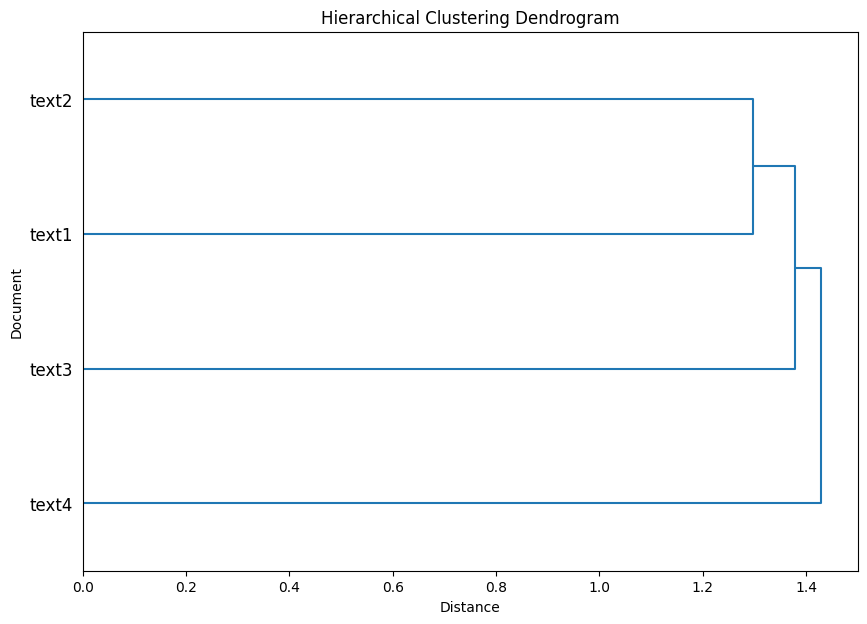

In [46]:
#덴드로그램을 그림
import matplotlib.pyplot as plt
plot_dendrogram(clustering, labels=['text1','text2','text3','text4'])

In [55]:
from sklearn.cluster import AgglomerativeClustering
# cosine_dist = 1 - cosine_sim
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster.fit_predict(cosine_sim)



array([0, 0, 0, 1], dtype=int64)

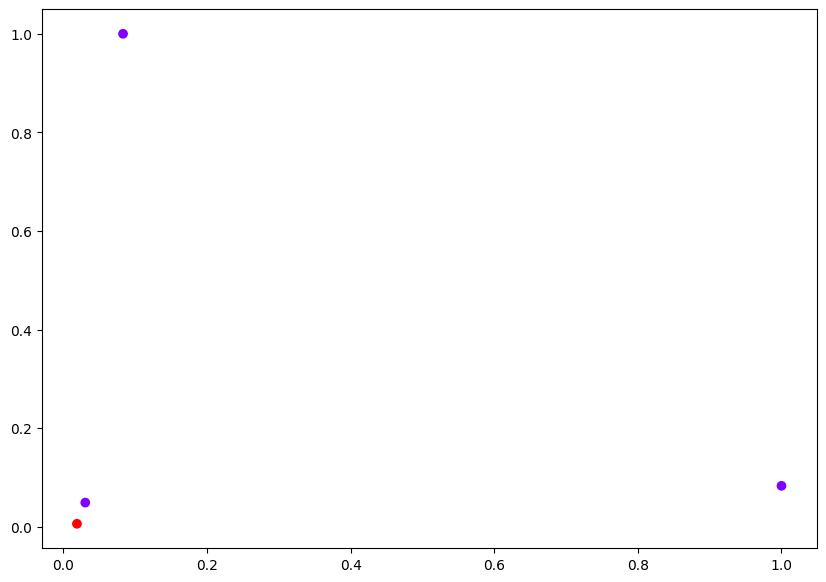

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(cosine_sim[:,0], cosine_sim[:,1], c=cluster.labels_, cmap='rainbow')

### 총정리

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 대용량의 문서를 읽는 generator
def generate_large_documents(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            yield line.strip()

# TF-IDF 가중치를 계산하는 함수
def calculate_tfidf(documents_generator):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents_generator)
    return tfidf_matrix

# 코사인 유사도를 계산하는 함수
def calculate_cosine_similarity(tfidf_matrix):
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

# 클러스터링을 수행하는 함수
def perform_clustering(similarity_matrix):
    clustering = linkage(similarity_matrix, method='ward')
    return clustering

# 덴드로그램을 그리는 함수
def plot_dendrogram(clustering, labels):
    plt.figure(figsize=(10, 7))
    dendrogram(clustering, labels=labels, orientation='right')
    plt.xlabel('Distance')
    plt.ylabel('Document')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

# 대용량 문서 파일의 경로
file_path = "large_documents.txt"

# 대용량 문서를 처리하고 클러스터링 수행
documents_generator = generate_large_documents(file_path)
tfidf_matrix = calculate_tfidf(documents_generator)
similarity_matrix = calculate_cosine_similarity(tfidf_matrix)
clustering = perform_clustering(similarity_matrix)

# 덴드로그램을 그림
plot_dendrogram(clustering, labels=None)

In [66]:
import sqlalchemy
import urllib.parse
import json

with open("conn_db.json", 'r') as f:
    db_conn = json.load(f)
db_password = urllib.parse.quote_plus(db_conn['PASS'])

engine = sqlalchemy.create_engine(f"mysql://{db_conn['USER']}:{db_password}@{db_conn['HOST']}:{db_conn['PORT']}/{db_conn['DB']}")

In [5]:
import pandas as pd
df=pd.read_sql_query("select * from customers", con=engine)[1:]
df

ProgrammingError: (MySQLdb.ProgrammingError) (1146, "Table '2nd_db5.customers' doesn't exist")
[SQL: select * from customers]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [58]:
import pickle
with open('./clustering_result.pkl', 'rb') as f:
    clustering = pickle.load(f)

In [59]:
clustering

array([[2.64000000e+02, 3.60000000e+02, 0.00000000e+00, 2.00000000e+00],
       [6.02000000e+02, 8.28000000e+02, 5.68115028e-02, 2.00000000e+00],
       [5.60000000e+02, 8.35000000e+02, 8.34554235e-02, 2.00000000e+00],
       ...,
       [1.92100000e+03, 1.99500000e+03, 6.30623476e+00, 5.87000000e+02],
       [1.99200000e+03, 1.99600000e+03, 7.29973387e+00, 9.13000000e+02],
       [1.99300000e+03, 1.99700000e+03, 8.97500474e+00, 1.00000000e+03]])

In [70]:
clustering.shape

(999, 4)

In [60]:
# 덴드로그램을 그리는 함수
def plot_dendrogram(clustering, labels):
    plt.figure(figsize=(10, 7))
    dendrogram(clustering, labels=labels, orientation='right')
    plt.xlabel('Distance')
    plt.ylabel('Document')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()

In [ ]:
plot_dendrogram(clustering